
# Example 4.2.1

In this example we illustrate the convolution in an image. The script defines a simple convolution at low level.

The first step is, as usual, to import the needed libraries. We use numpy in this experiment.


In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import imageio
#from google.colab import drive
#drive.mount('/content/gdrive') # This is for Google Collab


## Image reading.

The image is stored locally in the same folder as the script and it is imported intop Python with matplotlib.image. You must probably change the path where image Apple_cup.jpg is.

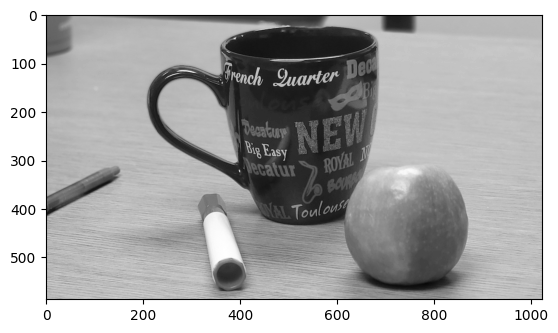

In [2]:
# Read Image
img = mpimg.imread('Data/Apple_cup.jpg')
#img = mpimg.imread('skyscrapers.jpeg')
#img = mpimg.imread('table.jpg')
img=np.uint8(np.sum(img,2)/3)
# Output Images
plt.imshow(img,cmap="gray")
plt.show()
imageio.imwrite('Data/I.jpg', img)


## Convolution definition

This is a simple function to process the convoution of the image with a given kernel. More sophisticated code is shown in further examples. Nevertheless, it is worth to understand how this simple code works, as it will be reused in these examples.

In [3]:
def convolution2D(I, kernel):
    xO = I.shape[0]-kernel.shape[0]+1
    yO = I.shape[1]-kernel.shape[1]+1
    O = np.zeros((xO, yO))

    for y in range(I.shape[1]-kernel.shape[1]):
        for x in range(I.shape[0]-kernel.shape[0]):
            O[x, y] = (kernel * I[x: x + kernel.shape[0], y: y + kernel.shape[1]]).sum()
    return O

# This is an auxiliary function to print things.
def print_images(O):
  plt.imshow(O,cmap="gray")
  plt.title('COnvolved image')
  plt.show()
  plt.imshow(np.abs(O),cmap="gray")
  plt.title('Absolute value of the convolution')
  plt.show()
  plt.imshow(np.abs(O)>np.mean(np.abs(O)),cmap="gray")
  plt.title('Binarized image')
  plt.show()


## Convolution
Here  a kernel is defined as

$$
\text{kernel} = \left(\begin{array}{rrr}
-1& -1& -1\\ -1 & 8 & -1\\ -1&-1& -1
\end{array} \right)
$$
This kernel enhances the change. If the image has pixels of the same values in the convolution area of $3\times3$ pixels, the result of the convolution will be zero. If the center pixel has a value different from the sum of values around it, the result will be nonzero.

In [4]:
#kernel=np.array([[1,0, -1],[1, 0, -1],[1, 0, -1]])
#O1=convolution2D(img,kernel)
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
O=convolution2D(img,kernel)
#imageio.imwrite('O.jpg', (np.max(np.abs(O))- np.abs(O)))

Once the convolution is applied, the absolute value of the convolution and n a thresholded of it are represented.  

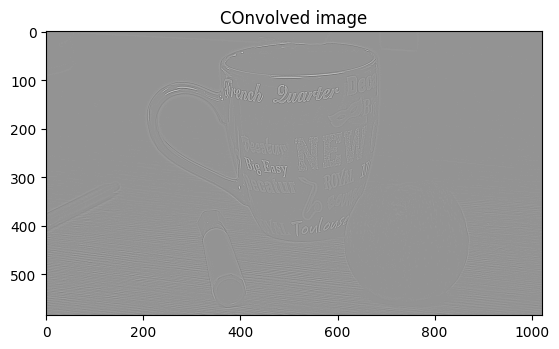

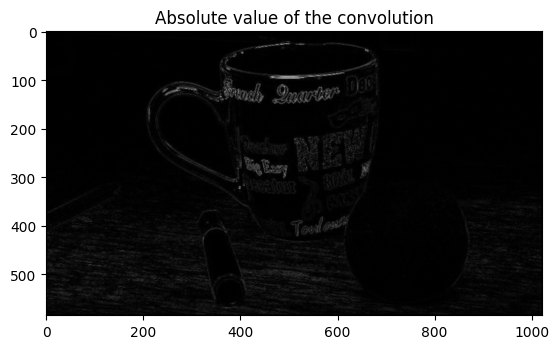

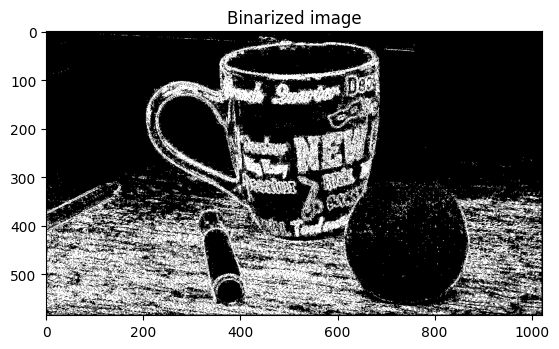

In [5]:
print_images(O)